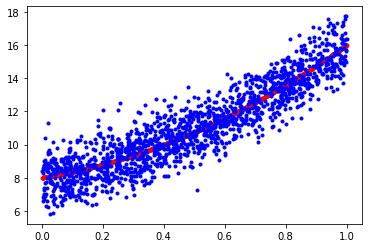

In [0]:
#1(a). generate a dataset from y=5*x**2+3*x+8 with noise
import numpy
num_samples = 1600
x = numpy.random.rand(num_samples, 1)
y = 5*x**2+3*x+8
noise = numpy.random.randn(num_samples, 1)
y_withNoise = y + noise
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y,"r.")
plt.plot(x,y_withNoise,"b.")

In [0]:
#1(b). Create an 80/20 train/test split of the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y_withNoise, test_size=0.2, random_state = 42)

(a) Generate a dataset by sampling 1,600 values from a quadratic function, with noise
added to the sampled values. (Code)
(b) Create an 80/20 train/test split of the dataset. (Code)
(c) Train and evaluate the predictive performance for each of the following regression
models: linear, polynomial (to the 4th degree), polynomial (to the 4th degree)
with Ridge regularization (regularization strength set to 0.5), and polynomial
(to the 4th degree) with Lasso regularization (regularization strength set to 0.5).
Evaluate using mean squared error. Report all values in a single table. (Code
and Write-up)
(d) Write a discussion analyzing and comparing the two models. Explain which model
performs better and why. Also, address which models you think are underfitting
versus overfitting and explain why. Your discussion should consist of two to four paragraphs. (Write-up)

The mean squared error for the linear model is: 1.1751319558079611


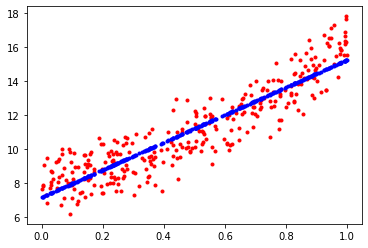

In [0]:
#1(c1). Train and evaluate the predictive performance for linear regression models 
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train, y_train)
y_predicted_lr= lr_model.intercept_ + lr_model.coef_*x_test

from sklearn.metrics import mean_squared_error
evaluation_lr = mean_squared_error(y_test, y_predicted_lr)
print ("The mean squared error for the linear model is:", evaluation_lr)

plt.plot(x_test,y_test,"r.")
plt.plot(x_test,y_predicted_lr,"b.")

The mean squared error for the polynomial is: 12.949683689825047


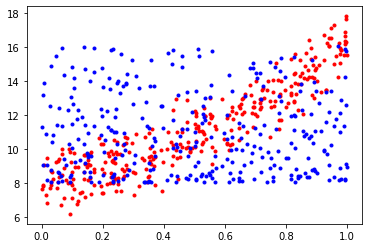

In [0]:
#1(c2). Train and evaluate the predictive performance for polynomial (to the 4th degree)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=4, include_bias=False)
x_poly = poly_features.fit_transform(x)

x_polyTrain, x_polyTest, y_polyTrain, y_polyTest = train_test_split (x_poly, y_withNoise, test_size=0.2, random_state=42)

poly_model = linear_model.LinearRegression()
poly_model.fit(x_polyTrain, y_polyTrain)
y_predicted_pl = poly_model.predict(x_polyTest)
plt.plot(x_test, y_test, "r.")
plt.plot(x_test, y_predicted_pl, "b.")

from sklearn.metrics import mean_squared_error
evaluation_pl = mean_squared_error(y_test, y_predicted_pl)
print ("The mean squared error for the polynomial is:", evaluation_pl)


The mean squared error for the polynomial with Ridge regularization is: 12.902085952243812


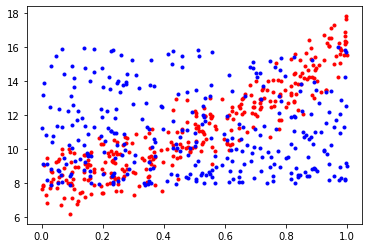

In [0]:
#1(c3). Train and evaluate the predictive performance for polynomial (to the 4th degree) with Ridge regularization (regularization strength set to 0.5)

ridge_model = linear_model.Ridge(alpha=0.5)
ridge_model.fit(x_polyTrain, y_polyTrain)
y_predicted_pl_ridge = ridge_model.predict(x_polyTest)
plt.plot(x_test, y_test, "r.")
plt.plot(x_test, y_predicted_pl_ridge, "b.")

from sklearn.metrics import mean_squared_error
evaluation_pl_ridge = mean_squared_error(y_test, y_predicted_pl_ridge)
print ("The mean squared error for the polynomial with Ridge regularization is:", evaluation_pl_ridge)


The mean squared error for the polynomial with Lasso regularization is: 7.373089229111693


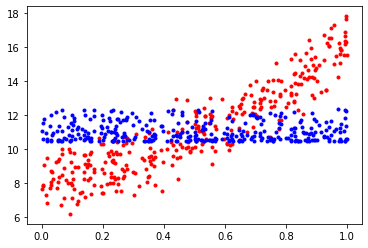

In [0]:
#1(c4). Train and evaluate the predictive performance for polynomial (to the 4th degree) with Lasso regularization (regularization strength set to 0.5)

lasso_model = linear_model.Lasso(alpha=0.5)
lasso_model.fit(x_polyTrain, y_polyTrain)
y_predicted_pl_lasso = lasso_model.predict(x_polyTest)
plt.plot(x_test, y_test, "r.")
plt.plot(x_test, y_predicted_pl_lasso, "b.")

from sklearn.metrics import mean_squared_error
evaluation_pl_lasso = mean_squared_error(y_test, y_predicted_pl_lasso)
print ("The mean squared error for the polynomial with Lasso regularization is:", evaluation_pl_lasso)


(0.0, 1.0, 0.0, 1.0)

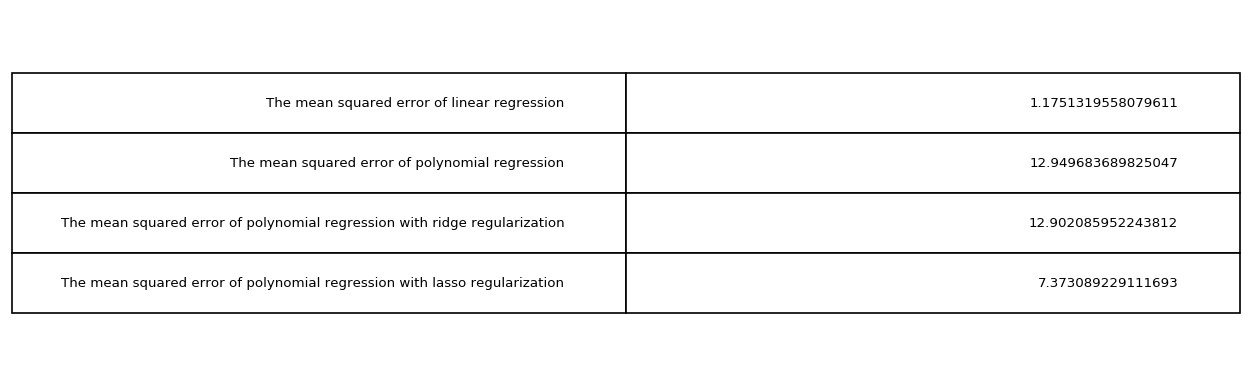

In [0]:
#1(c5).Evaluate using mean squared error. Report all values in a single table. (Code and Write-up)

fig = plt.figure(dpi=120)
ax = fig.add_subplot(1,1,1)
table_data=[
    ["The mean squared error of linear regression", evaluation_lr],
    ["The mean squared error of polynomial regression", evaluation_pl],
    ["The mean squared error of polynomial regression with ridge regularization", evaluation_pl_ridge],
    ["The mean squared error of polynomial regression with lasso regularization", evaluation_pl_lasso],
]
table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(20)
table.scale(2.2,3)
ax.axis('off')


In [0]:
#1(d). XXXX

(a) Load a real dataset not covered in class that is designed for the regression problem;
e.g., from sklearn.datasets, Kaggle, your own data, etc. (Code)
(b) Create a 60/20/20 train/val/test split of the dataset. (Code)

In [0]:
#2(a). Load a real dataset not covered in class that is designed for the regression problem;
from sklearn.datasets import fetch_california_housing
housing_dataset = fetch_california_housing()
print ("Keys of the housing dataset:\n", housing_dataset.keys())
print(housing_dataset["feature_names"])

Keys of the housing dataset:
 dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [106]:
#2(b) Create a 60/20/20 train/val/test split of the dataset.
from sklearn.model_selection import train_test_split
x_trainandval_c, x_test_c, y_trainandval_c, y_test_c = train_test_split(housing_dataset.data, housing_dataset.target, test_size=0.2, random_state=42)
x_train_c, x_val_c, y_train_c, y_val_c = train_test_split (x_trainandval_c, y_trainandval_c, test_size=0.25, random_state=42)
print("number samples in training: ", len(x_train_c))
print("number samples in testing: ", len(x_test_c))
print("number samples in validation: ", len(x_val_c))

number samples in training:  12384
number samples in testing:  4128
number samples in validation:  4128


(c) Plot performance curves for the polynomial regression model (to the 4th degree)
when varying the regularization strength for each of the following types of regularization: ridge and lasso. Vary the regularization strength to have at least 10 different values and evaluate using mean squared error on the validation split.
Identify the regularization type-value that returns the best result for each regularization type. (Code and Write-up)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.32062e-38): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.54457e-38): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.85181e-38): result may not be accurate.
  overwrite_a=True).T


[0.33, 0.34, 0.35000000000000003, 0.36000000000000004, 0.37000000000000005, 0.38000000000000006, 0.39000000000000007, 0.4000000000000001, 0.4100000000000001, 0.4200000000000001] 10
[800288751.7773571, 800156438.6824224, 800024161.3205327, 799891919.6791223, 799759713.7455692, 799627543.5068544, 43117236.74113868, 15126781012.776361, 799231246.8330525, 565557138.024908] 10


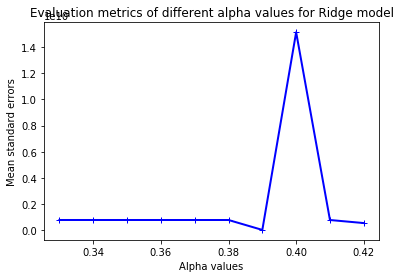

In [189]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

poly_features_c = PolynomialFeatures(degree=4, include_bias=False)
x_poly_train_c = poly_features_c.fit_transform(x_train_c)
x_poly_val_c = poly_features_c.fit_transform(x_val_c)
x_poly_test_c = poly_features_c.fit_transform(x_test_c)

start_alpha = 1
finish_alpha = 11
increment_amt = 1
alpha_num = 0.33
alpha_value = []
evaluation_alpha = []

for alpha_count in range (start_alpha, finish_alpha, increment_amt):
  ridge_model_c = linear_model.Ridge(alpha= alpha_num)
  ridge_model_c.fit(x_poly_train_c, y_train_c)
  y_predicted_ridge_c = ridge_model_c.predict(x_poly_val_c)
  evaluation_ridge_c = mean_squared_error(y_val_c, y_predicted_ridge_c)
  alpha_value.append(alpha_num)
  evaluation_alpha.append(evaluation_ridge_c)
  alpha_num = alpha_num + 0.01

plt.plot(alpha_value, evaluation_alpha, "b-+", linewidth=2)
plt.xlabel("Alpha values")
plt.ylabel("Mean standard errors")
plt.title("Evaluation metrics of different alpha values for Ridge model")

print (alpha_value, len(alpha_value))
print (evaluation_alpha, len(evaluation_alpha))

Best alpha value for Ridge regression is 0.39 with the SE 43117236.74113868

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2398.2518406725976, tolerance: 1.6403916582471714
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2404.0182692621606, tolerance: 1.6403916582471714
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2406.728139418509, tolerance: 1.6403916582471714
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2408.36

[0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09] 9
[4.570647856282031, 2.803933352992465, 3.1699126882340685, 3.4799859407285187, 4.7228030034041755, 6.478690122761449, 8.559096693507263, 11.04427562664166, 14.051792337739348] 9


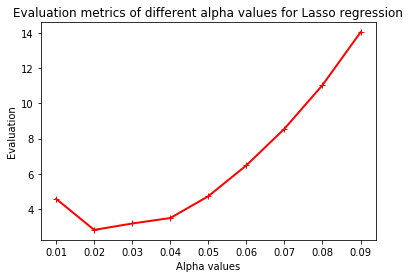

In [190]:
start_alpha_l = 1
finish_alpha_l = 10
increment_amt_l = 1
alpha_num_l = 0.01
alpha_value_l = []
evaluation_alpha_l = []
evaluation_alpha_l=[]

for alpha_count in range (start_alpha_l, finish_alpha_l, increment_amt_l):
  lasso_model_c = linear_model.Lasso(alpha= alpha_num_l)
  lasso_model_c.fit(x_poly_train_c, y_train_c)
  y_predicted_lasso_c = lasso_model_c.predict(x_poly_val_c)
  evaluation_lasso_c = mean_squared_error(y_val_c, y_predicted_lasso_c)
  alpha_value_l.append(alpha_num_l)
  evaluation_alpha_l.append(evaluation_lasso_c)
  alpha_num_l = alpha_num_l + 0.01

plt.plot(alpha_value_l, evaluation_alpha_l, "r-+", linewidth=2)
plt.xlabel("Alpha values")
plt.ylabel("Evaluation")
plt.title("Evaluation metrics of different alpha values for Lasso regression")

print (alpha_value_l, len(alpha_value_l))
print (evaluation_alpha_l, len(evaluation_alpha_l))

The best alpha value for the Lasso regression is 0.02

(d) Evaluate the model with the top-performing regularization value for each regularization type on the test split using mean squared error. Report the resulting values.

In [194]:
#for ridge regression
ridge_model_c_test = linear_model.Ridge(alpha= 0.39)
ridge_model_c_test.fit(x_poly_train_c, y_train_c)
y_predicted_ridge_c_test = ridge_model_c_test.predict(x_poly_test_c)
evaluation_ridge_c_test = mean_squared_error(y_test_c, y_predicted_ridge_c_test)
print ("The mean squared error for the Ridge regression is: ", evaluation_ridge_c_test)

The mean squared error for the Ridge regression is:  7511.724825553852


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.32062e-38): result may not be accurate.
  overwrite_a=True).T


In [195]:
#for lasso regression 
lasso_model_c_test = linear_model.Lasso(alpha= 0.02)
lasso_model_c_test.fit(x_poly_train_c, y_train_c)
y_predicted_lasso_c_test = lasso_model_c_test.predict(x_poly_test_c)
evaluation_lasso_c_test = mean_squared_error(y_test_c, y_predicted_lasso_c_test)
print ("The mean squared error for the Lasso regression is: ", evaluation_lasso_c_test)

The mean squared error for the Lasso regression is:  42.36531634964883


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2404.0182692621606, tolerance: 1.6403916582471714
  positive)


(e) Write a discussion analyzing and comparing the two resulting regression models.Explain the impact of the regularization parameter. Also, discuss which regularization type leads to better results and why you think this occurs. The discussion should consist of two to four paragraphs. (Write-up)
lasso better because absolute value

#3.# 
(a) Load a real dataset not covered in class that is designed for the classication
problem; e.g., from sklearn.datasets, Kaggle, your own data, etc. (Code)

In [119]:
from sklearn.datasets import load_wine
wineData = load_wine()
print ("Keys of the wine dataset:\n", wineData.keys())

Keys of the wine dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


3.(b) Create a 60/20/20 train/val/test split of the dataset. (Code)

In [110]:
from sklearn.model_selection import train_test_split
x_trainandval_w, x_test_w, y_trainandval_w, y_test_w = train_test_split(wineData.data, wineData.target, test_size=0.2, random_state=42)
x_train_w, x_val_w, y_train_w, y_val_w = train_test_split (x_trainandval_w, y_trainandval_w, test_size=0.25, random_state=42)
print("number samples in training: ", len(x_train_w))
print("number samples in testing: ", len(x_test_w))
print("number samples in validation: ", len(x_val_w))

number samples in training:  106
number samples in testing:  36
number samples in validation:  36


(c) Examine the impact of regularization for this model. To do so, plot performance curves for the Perceptron model when varying the regularization strength for each of the following types of regularization: ridge (l2 penalty) and lasso (l1 penalty).
Vary the regularization strength to have at least 10 different values and evaluate on the validation split using accuracy. Report the regularization type-value pair that returns the best result. (Code and Write-up)

[0.2777777777777778, 0.2777777777777778, 0.2777777777777778, 0.3333333333333333, 0.4444444444444444, 0.4722222222222222, 0.4722222222222222, 0.4166666666666667, 0.3888888888888889, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444] 20 [0.38, 0.382, 0.384, 0.386, 0.388, 0.39, 0.392, 0.394, 0.396, 0.398, 0.4, 0.402, 0.404, 0.406, 0.40800000000000003, 0.41000000000000003, 0.41200000000000003, 0.41400000000000003, 0.41600000000000004, 0.41800000000000004] 20


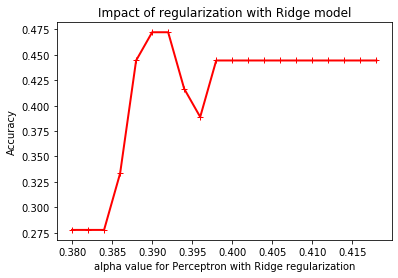

In [152]:
from sklearn.linear_model import Perceptron
#Ridge regression
start_alpha_num = 1
finish_alpha_num = 21
increment_alpha_amt = 1
alpha_value_p_ridge = 0.38
preceptron_alpha_ridge = []
accuracy_alpha_ridge = []

for alpha_num in range (start_alpha_num, finish_alpha_num, increment_alpha_amt):
  classifier_ridge = Perceptron(random_state=0, penalty='l2', alpha= alpha_value_p_ridge)
  classifier_ridge.fit(x_train_w, y_train_w)
  accuracy_ridge=classifier_ridge.score(x_val_w, y_val_w)
  preceptron_alpha_ridge.append(alpha_value_p_ridge)
  alpha_value_p_ridge= alpha_value_p_ridge + 0.002
  accuracy_alpha_ridge.append(accuracy_ridge)

%matplotlib inline
plt.plot(preceptron_alpha_ridge, accuracy_alpha_ridge, "r-+", linewidth=2)
plt.xlabel("alpha value for Perceptron with Ridge regularization")
plt.ylabel("Accuracy")
plt.title("Impact of regularization with Ridge model")
print (accuracy_alpha_ridge, len (accuracy_alpha_ridge), preceptron_alpha_ridge, len (preceptron_alpha_ridge))

The best performance with ridge regression is an acurracy of 0.4722 with the alpha value of 0.39.

[0.4722222222222222, 0.6666666666666666, 0.3333333333333333, 0.6111111111111112, 0.6388888888888888, 0.6666666666666666, 0.6944444444444444, 0.6944444444444444, 0.5, 0.6111111111111112, 0.4444444444444444, 0.5277777777777778, 0.5555555555555556, 0.5555555555555556, 0.7222222222222222, 0.7222222222222222, 0.6111111111111112, 0.75, 0.5, 0.5277777777777778] 20 [0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.7100000000000001, 0.7200000000000001, 0.7300000000000001, 0.7400000000000001, 0.7500000000000001, 0.7600000000000001, 0.7700000000000001, 0.7800000000000001, 0.7900000000000001] 20


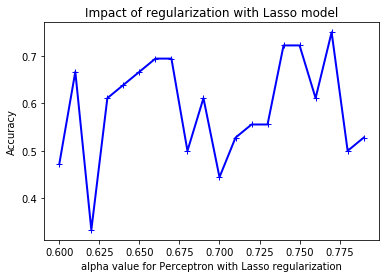

In [155]:
#Lasso regression
start_alpha_num = 1
finish_alpha_num = 21
increment_alpha_amt = 1
alpha_value_p_lasso = 0.6
preceptron_alpha_lasso = []
accuracy_alpha_lasso = []

for alpha_num in range (start_alpha_num, finish_alpha_num, increment_alpha_amt):
  classifier_lasso = Perceptron(random_state=0, penalty='l1', alpha= alpha_value_p_lasso)
  classifier_lasso.fit(x_train_w, y_train_w)
  accuracy_lasso=classifier_lasso.score(x_val_w, y_val_w)
  preceptron_alpha_lasso.append(alpha_value_p_lasso)
  alpha_value_p_lasso= alpha_value_p_lasso + 0.01
  accuracy_alpha_lasso.append(accuracy_lasso)

%matplotlib inline
plt.plot(preceptron_alpha_lasso, accuracy_alpha_lasso, "b-+", linewidth=2)
plt.xlabel("alpha value for Perceptron with Lasso regularization")
plt.ylabel("Accuracy")
plt.title("Impact of regularization with Lasso model")
print (accuracy_alpha_lasso, len (accuracy_alpha_lasso), preceptron_alpha_lasso, len (preceptron_alpha_lasso))

best accuracy is 0.75 with the alpha 0.77 

(d) Next, plot the performance of the model on the test set based on the number of epochs used to train the algorithm. Use the single model from the previous step that returns the best performance across both regularization types. Plot a curve which shows the resulting model's performance for at least 10 epoch values. Use accuracy as your evaluation metric. (Code and Write-up)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96] 20 [0.5277777777777778, 0.7222222222222222, 0.7222222222222222, 0.4722222222222222, 0.4722222222222222, 0.4722222222222222, 0.4722222222222222, 0.4722222222222222, 0.4722222222222222, 0.4722222222222222, 0.4722222222222222, 0.4722222222222222, 0.4722222222222222, 0.4722222222222222, 0.4722222222222222, 0.4722222222222222, 0.4722222222222222, 0.4722222222222222, 0.4722222222222222, 0.4722222222222222] 20


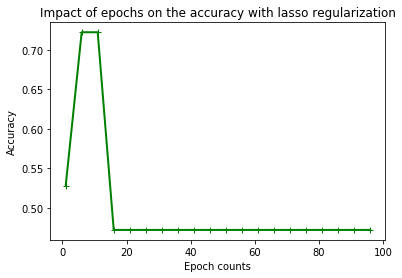

In [182]:
start_epoch_num = 1
finish_epoch_num = 21
increment_epoch_amt = 1

epoch_count = 1
pred_scores = []
num_epochs = []

for epoch_num in range (start_epoch_num, finish_epoch_num, increment_epoch_amt):
  classifier_epoch = Perceptron(random_state=42, penalty='l1', alpha= 0.77, max_iter = epoch_count)
  classifier_epoch.fit(x_train_w,y_train_w)
  accuracy_epoch = classifier_epoch.score(x_test_w, y_test_w)
  pred_scores.append(accuracy_epoch)
  num_epochs.append(epoch_count)
  epoch_count = epoch_count + 5

%matplotlib inline
plt.plot(num_epochs, pred_scores, "g-+", linewidth=2)
plt.xlabel("Epoch counts")
plt.ylabel("Accuracy")
plt.title("Impact of epochs on the accuracy with lasso regularization")
print (num_epochs, len (num_epochs), pred_scores, len (pred_scores))


(e) Write a discussion about the performance of the perceptron. For example, what regression types-values did better/worse and why do you think so? How did the number of training epochs affect the model's performance? Your discussion should consist of two to four paragraphs. (Write-up)